# Emotion Detection from Auduio Waves

### Importing 4 Dataset from Kaggle

- Ravdess Emotional Speech Dataset
- Surrey Audiovisual Expressed Emotion (SAVEE) Dataset
- CREMA D Dataset
- Toronto Emotional Speech Set (TESS) Dataset

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ravdess-emotional-speech-audio:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F107620%2F256618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T185837Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D64a71cab0a51a8873a4aa2cd540d44f7a805c4d22db90fd39b030349253abf01820a075ca9b56ec7a129bd055aa6d60f4da274c6d621adf80f6e60224ba329e4e0a10ca6fb5b014b92d0021e3c0360c740f0f79d79b720ad2affa08f2031128ea1f365e92bbc3c388fb16acf0700c021e81fbdaf9edf14c478108bc7ba213fe32d75ac0800a79008f682a6b0094c848fd636e6b5a99115fdd7acd5ec52755cc45be68aaa41632bc9f203a17b0cae4e800cb5530240b8fba6a442db52c0dd60f63359190e0b34ae614d2d06d38e12bbd172a394ce4314228cc102c6fd896f717300f56749388e16ab6a4171119cafd4bf66c20c86c72d2ae04cd12508238b7dba,toronto-emotional-speech-set-tess:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F316368%2F639622%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T185838Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c5dfd2f68cae5fe0bf04b17a229fb8dbce8b361682e94552683a20e447628d312b1beb4a3642d475631212a6fec69357a0c984529a7b5f6de7d12fcc3ef51ec6cf4087948d386bbe5a44eb9c37d2b0f921155bc5f4700652a735f97f2abf67dfc9a03f316d15e7adca60da1858d6656c2b39abb30620a561aee218575cdafcd58260ec2970ccb84bc509f16f37ed3d26ec37af8d9b9d1d15d8fe5b5112f425cfccce66a5a77f9d2cac0d8572d186d363fdb6d314e94ea2e1aeb5704e3aaa14a9768100d6032e43437e9c7bd1765ef4ad91f49b6038a1ee0bf4611992439d626797f6a2f675eb073241a225664e84626b1e75c6c3c6becb1033037b62f4809a7,cremad:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F325566%2F653195%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T185838Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D55063ad75d41c46619af7619f98599afac36de9a5ce9bbaeb757121247a2922bd03950fe5eff07441e7fbaddf43f4557e239943be207468b104ab9225f0395fe67442acda4caf7f3ce0a736b01293d0629666a75cf96ba37ad400d15cf30a81f6587baaaac770582f5b7f804a25a9e1c4193f9ed31f4ad598b9ba77ede8dcd58ac66a3c21660edf2bcf1c34cbdb84f4fde5ca864ab04322747d3025ff88d62c82bea7d4c90f896200a26d5d656591e334f0b7a0b9e2f3a6ce9a66bf2e4244280fd73aa90485b73028a0b64d6329b43ffca17b1cb98a31add47aed7f7a7846737a30d48318ebf96d3eb0212120fe7b9a612b3b33c250d5d4feab66bf48c3b70e2,surrey-audiovisual-expressed-emotion-savee:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F338555%2F671851%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240406%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240406T185838Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Ddfb1a22ae96121ea1c0d34ed1b2a9dd48546e22a956362cf441adccf9ef518eca26df01befbba612d58e4aced6648ae14ad4e00ed2c206c4b9b7f11eb87a17eded6fe9ebaf399fc4973b5c8007753d78522a9bda1aca00cd12d14d918827ceeb7e7a51fa89a908f652ee605046e8aab4df3e53c93bd2ef41696aa5ec0d75f1f75430e729cfba681779592eceb53beb4a7036eca81aab935ece87f4af6c7fe02f93dca2652cba553adabb1906ca8a519829e8920d3b6a75542188a2d715254443ec832e2a127c4888f26e57ceafa5c52f854fe8b62cea3093300444e482f4afc183be52c590d1dd4affec6580582994f106ebe8f29442506d02a6920c25deabe9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

### Importing required Libraries

In [ ]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import seaborn as sns

In [ ]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

TESS = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
SAVEE = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"
CREMA = "/kaggle/input/cremad/AudioWAV/"

# Run one example
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['JK_n25.wav', 'DC_f02.wav', 'JE_a08.wav', 'DC_h05.wav', 'KL_a02.wav']

## SAVEE Dataset

In [ ]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

labels
male_neutral     120
male_fear         60
male_angry        60
male_happy        60
male_disgust      60
male_surprise     60
male_sad          60
Name: count, dtype: int64

### Plotting waveplot and spectrogram for a sample audio

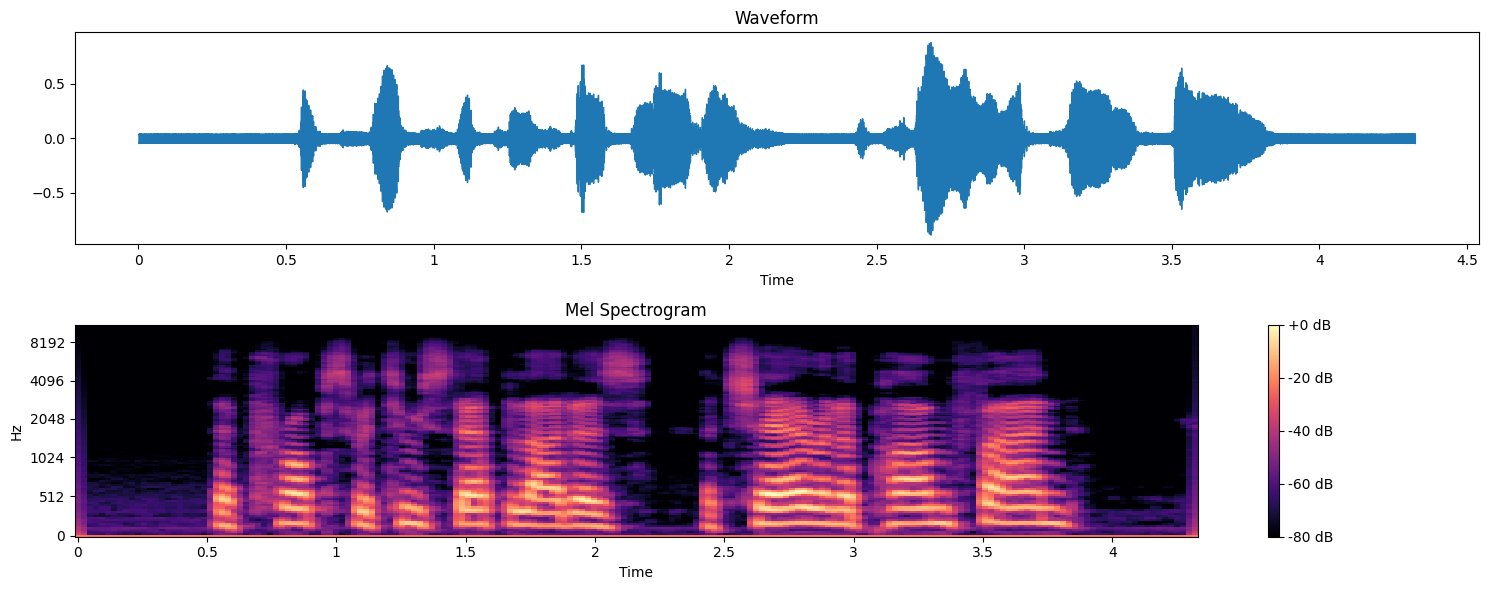

In [ ]:
# use the well known Librosa library for this task
fname = SAVEE + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

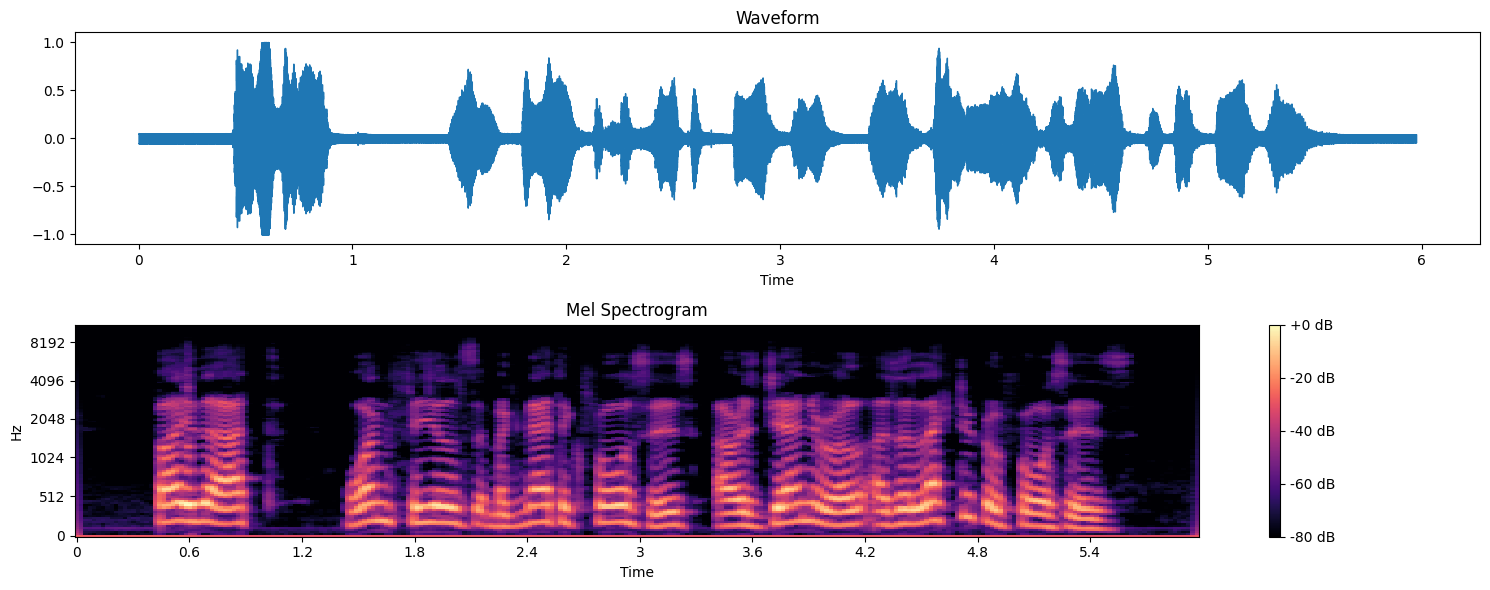

In [ ]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

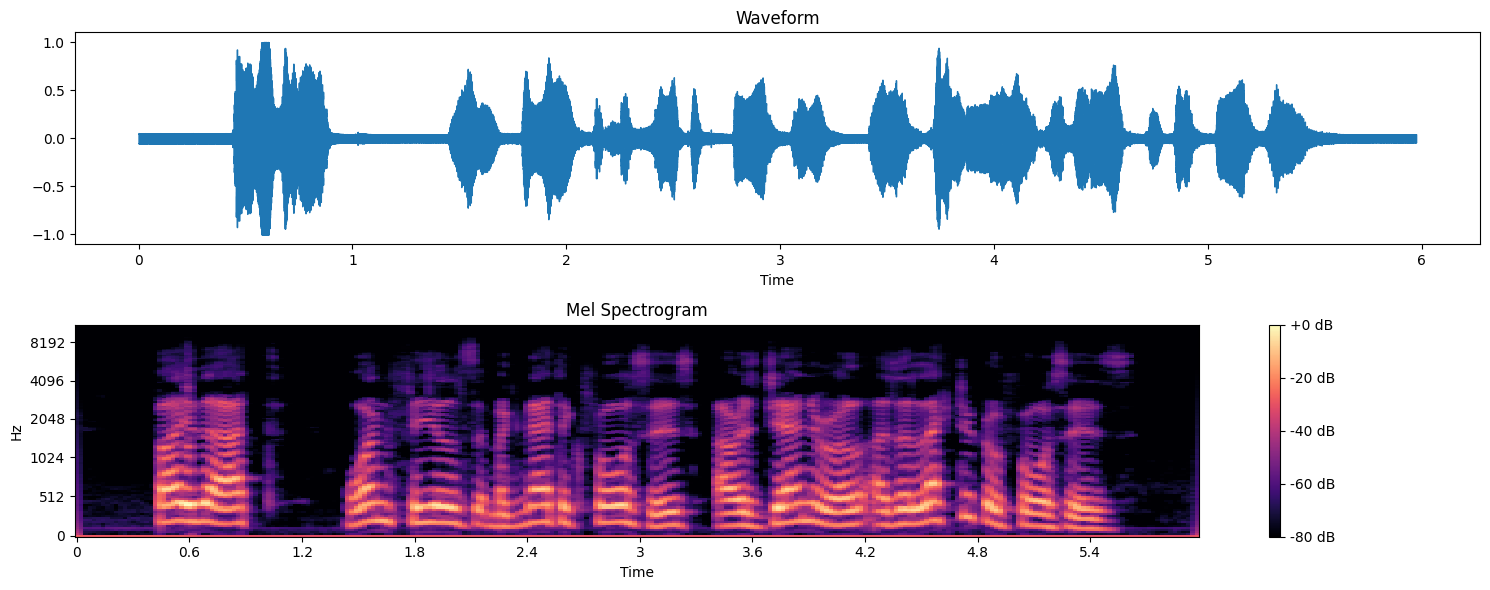

In [ ]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

## Ravdess Dataset

In [ ]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_fear           96
male_disgust        96
male_surprise       96
male_sad            96
male_happy          96
male_angry          96
female_surprise     96
female_happy        96
female_angry        96
female_fear         96
female_disgust      96
female_sad          96
Name: count, dtype: int64

### Plotting waveplot and spectrogram for a sample audio

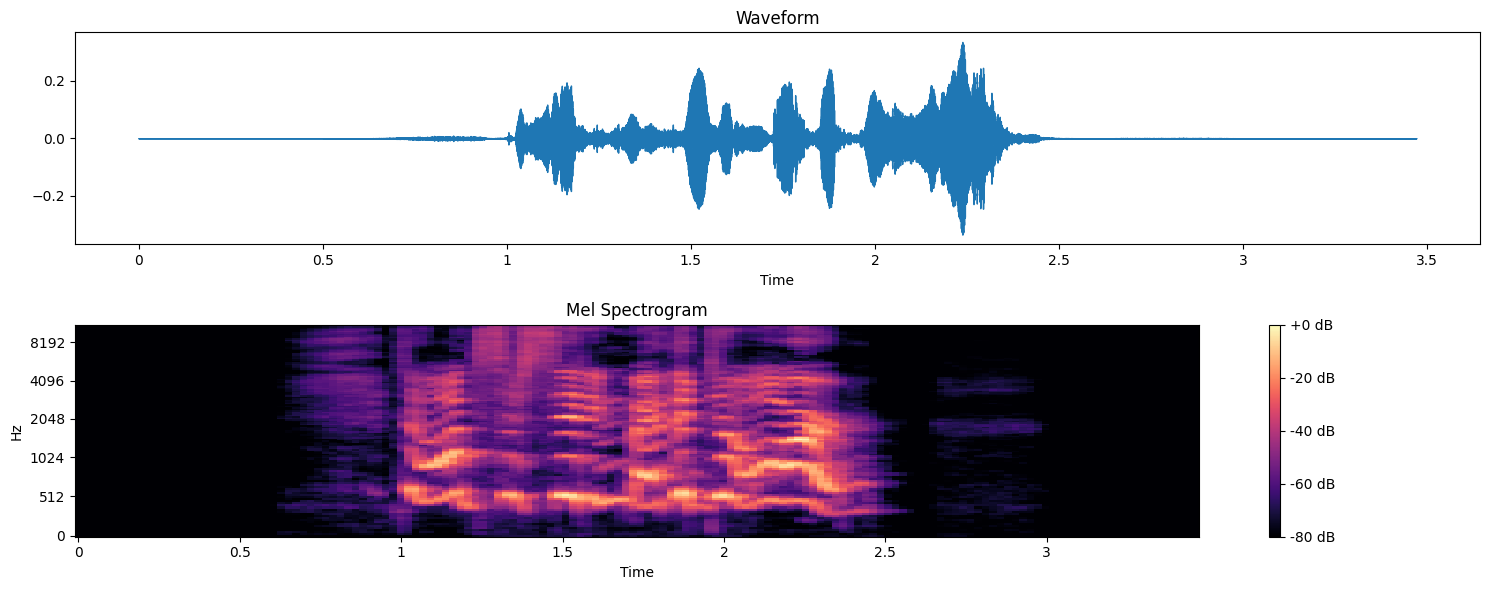

In [ ]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

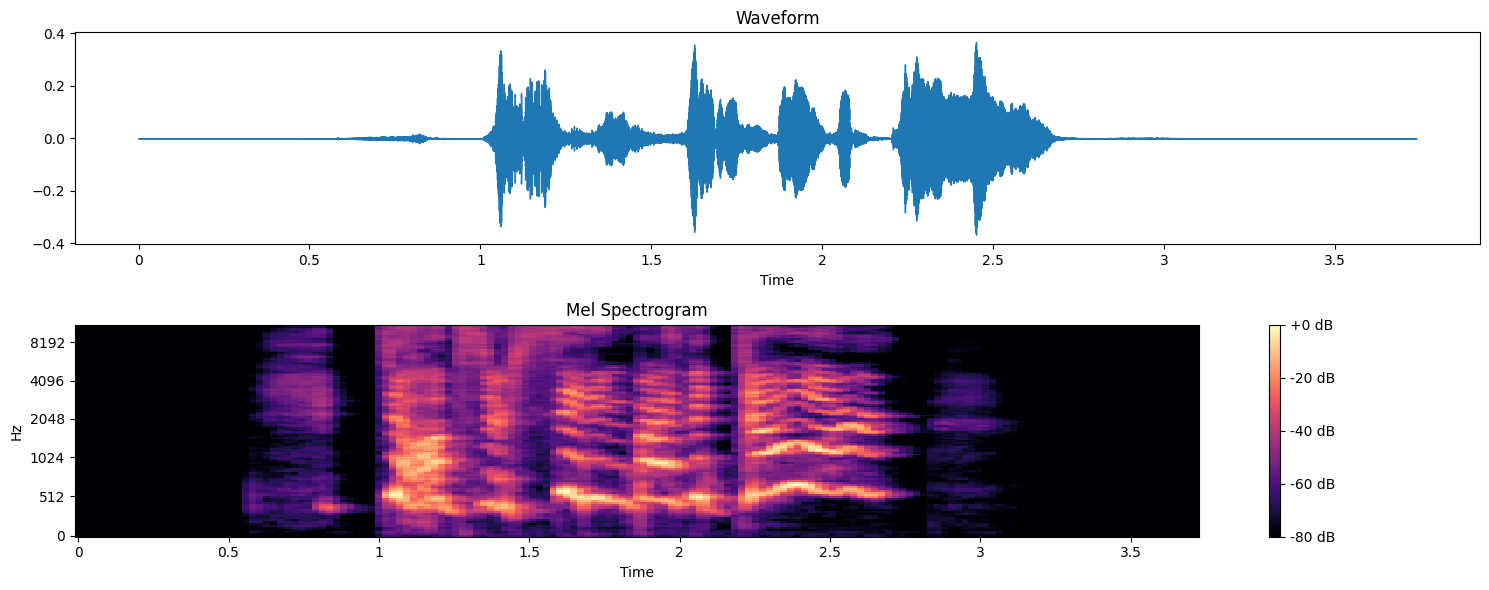

In [ ]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

## TESS Dataset

In [ ]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [ ]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: count, dtype: int64

### Plotting waveplot and spectrogram for a sample audio

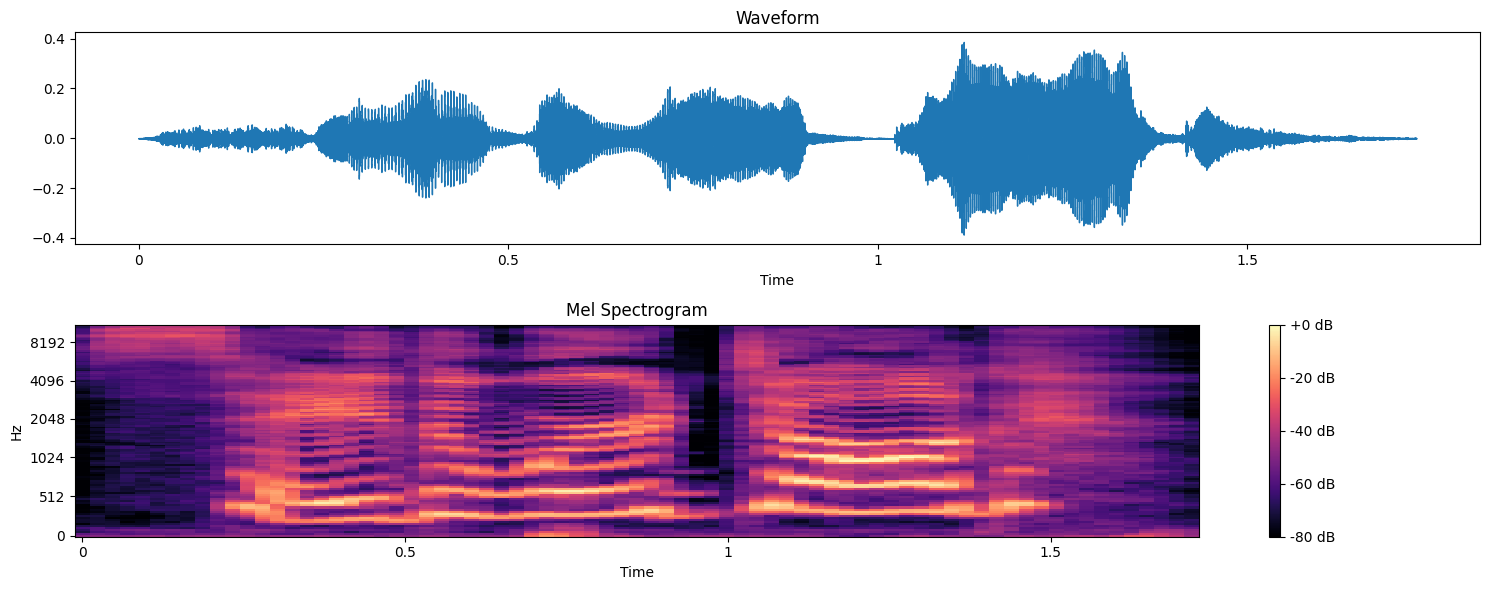

In [ ]:
# lets play a fearful track
fname = TESS + 'YAF_fear/YAF_dog_fear.wav'

data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

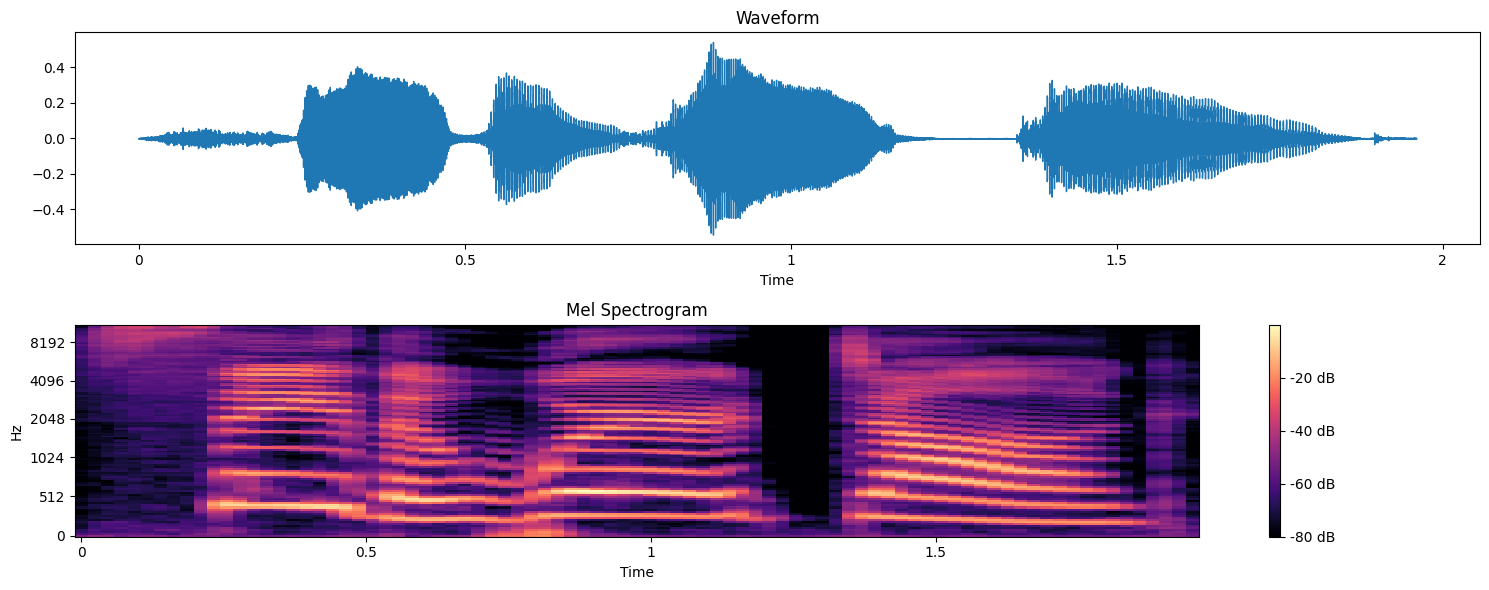

In [ ]:
# lets play a happy track
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav'

data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

## CREMA D Dataset

In [ ]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [ ]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list:
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)

CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

### Plotting waveplot and spectrogram for a sample audio

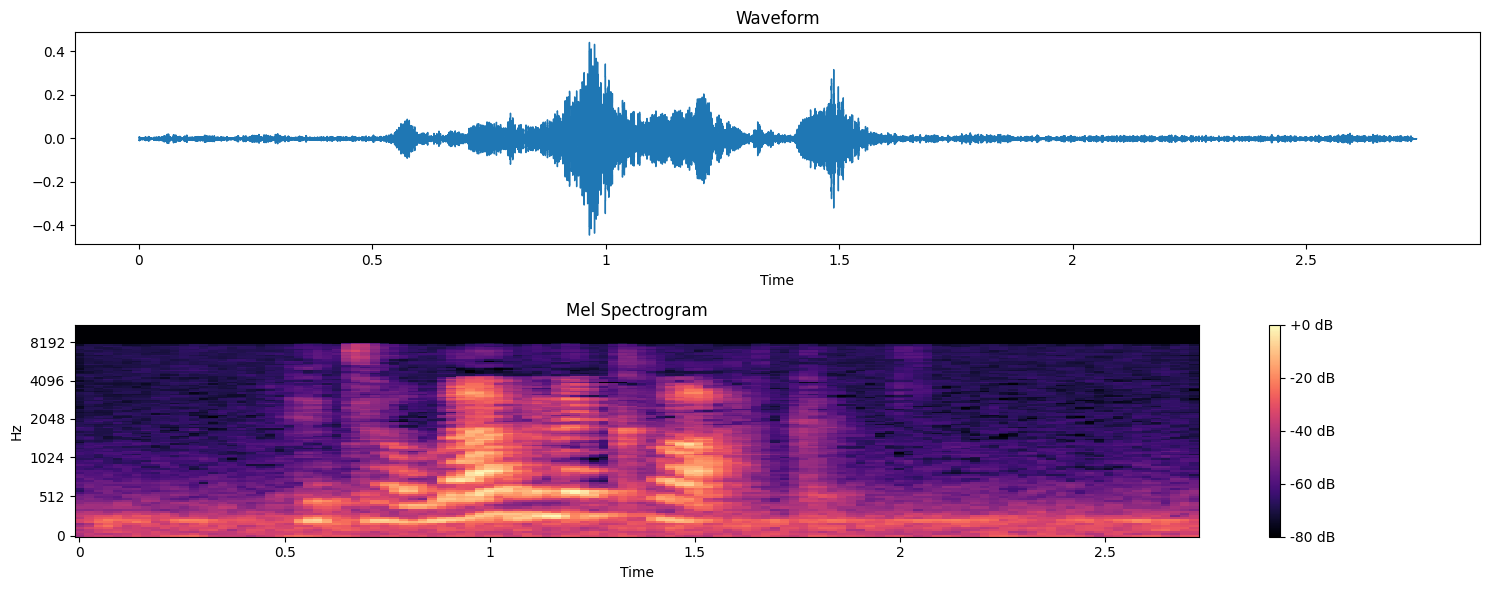

In [ ]:
# use the well known Librosa library for this task
fname = CREMA + '1012_IEO_HAP_HI.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

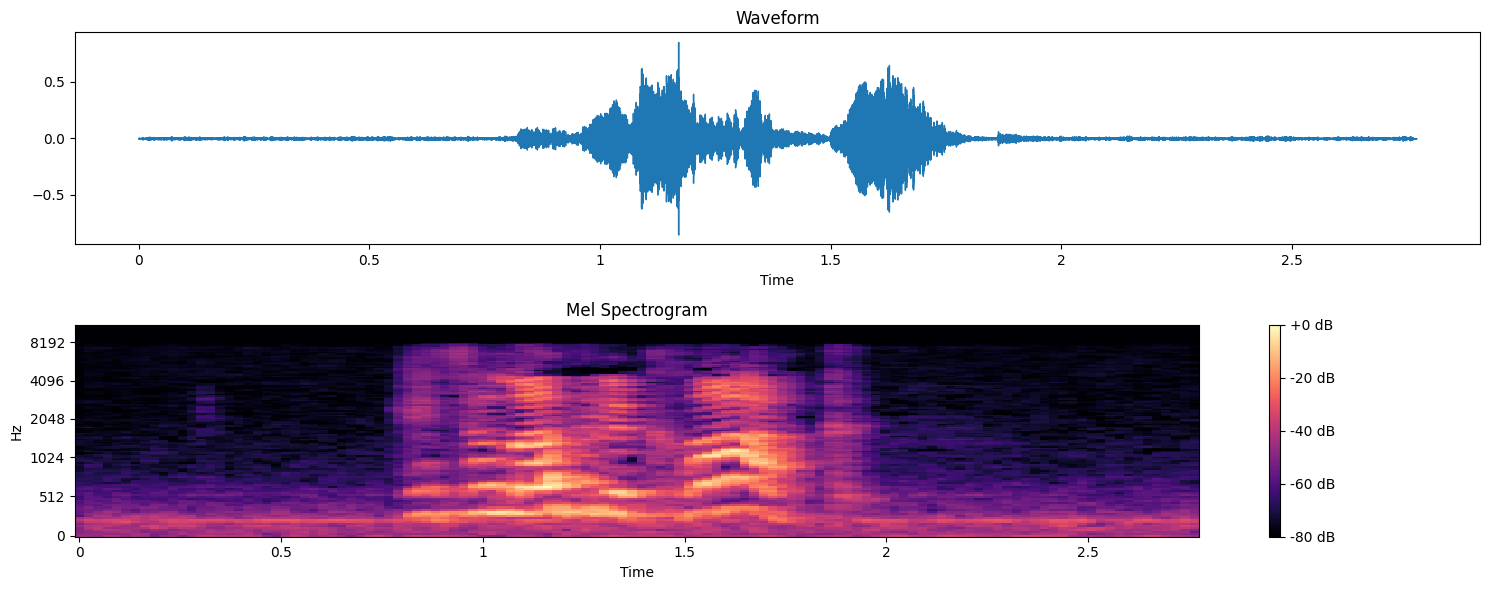

In [ ]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'
data, sampling_rate = librosa.load(fname)

# Plotting the waveform
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform')

# Compute mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

# Display mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

plt.tight_layout()

# Play the audio
ipd.Audio(fname)

### Merging all the 4 audio datasets

In [ ]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
female_happy       1096
female_angry       1096
female_fear        1096
female_disgust     1096
female_sad         1096
female_neutral     1056
male_neutral        839
male_fear           827
male_angry          827
male_happy          827
male_disgust        827
male_sad            827
female_surprise     496
male_surprise       156
Name: count, dtype: int64


In [ ]:
df.head()

labels source                                               path
0  male_neutral  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
1     male_fear  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
2    male_angry  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
3    male_happy  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...
4    male_angry  SAVEE  /kaggle/input/surrey-audiovisual-expressed-emo...

In [ ]:
df.shape

(12162, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  12162 non-null  object
 1   source  12162 non-null  object
 2   path    12162 non-null  object
dtypes: object(3)
memory usage: 380.1+ KB


In [ ]:
df.describe()

labels source                                               path
count          12162  12162                                              12162
unique            14      4                                              12162
top     female_happy  CREMA  /kaggle/input/surrey-audiovisual-expressed-emo...
freq            1096   7442                                                  1

In [ ]:
sns.countplot(data=df, x='labels', palette='Set1')
plt.xticks(rotation=45)
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()

<ipython-input-25-95f0b8f492ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='labels', palette='Set1')


## Data Augmentation

In [ ]:
#Data Augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate = rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

1. Simple Audio display

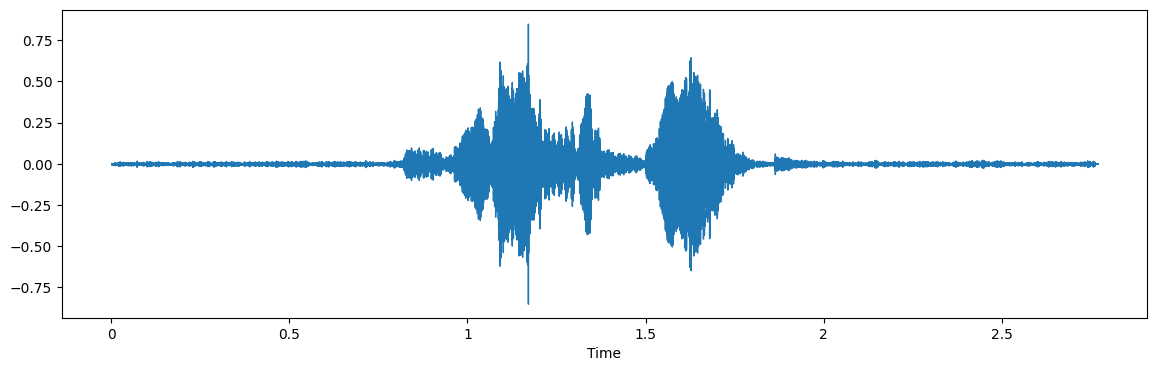

In [ ]:
#Simple Audio
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sampling_rate)
ipd.Audio(fname)

2. Noise Injection

In [ ]:
#Noise Injection
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

3. Stretching audio

In [ ]:
#Stretching
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

4. Shifting

In [ ]:
#Shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

5. Pitching audio

In [ ]:
#Pitch
x = pitch(data,sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
ipd.Audio(x, rate=sampling_rate)

## Feature Extraction

In [ ]:
#Feature Extraction

def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sampling_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sampling_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

### Appending augmentated audio to dataset (around 12000 --> 36000)

In [ ]:
X, Y = [], []
for path, emotion in zip(df.path, df.labels):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
len(X), len(Y), df.path.shape

(36486, 36486, (12162,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)

In [ ]:
Features.head()

0         1         2         3         4         5         6  \
0  0.020630  0.590108  0.514397  0.459259  0.477070  0.569517  0.607899   
1  0.026123  0.654744  0.592225  0.546996  0.565314  0.635782  0.640194   
2  0.024027  0.568514  0.597567  0.490190  0.440510  0.460102  0.498977   
3  0.028899  0.280709  0.314467  0.280912  0.308482  0.433463  0.410609   
4  0.034098  0.335945  0.363116  0.342572  0.388205  0.509293  0.452872   

          7         8         9  ...           153           154  \
0  0.514255  0.541816  0.612328  ...  1.212336e-06  9.643443e-07   
1  0.549631  0.572010  0.632133  ...  1.646593e-03  1.692356e-03   
2  0.523412  0.436365  0.475559  ...  8.294204e-07  5.515574e-07   
3  0.287712  0.353388  0.544346  ...  2.212071e-06  8.448381e-07   
4  0.313331  0.366913  0.562240  ...  3.886256e-03  3.642107e-03   

            155           156           157           158           159  \
0  8.481037e-07  8.028988e-07  7.614366e-07  7.312655e-07  7.171375e-07   
1  1.715377e-03  1.641224e-03  1.654602e-03  1.693644e-03  1.631872e-03   
2  3.954605e-07  3.749312e-07  3.200012e-07  2.905238e-07  2.474605e-07   
3  5.695435e-07  4.938134e-07  4.753928e-07  4.691497e-07  4.778777e-07   
4  3.590276e-03  3.535703e-03  3.805532e-03  3.577497e-03  3.632509e-03   

            160           161        labels  
0  6.117293e-07  3.318971e-07  male_neutral  
1  1.706740e-03  1.742515e-03  male_neutral  
2  1.579447e-07  3.094215e-08  male_neutral  
3  4.370459e-07  2.832772e-07     male_fear  
4  3.641023e-03  3.539326e-03     male_fear  

[5 rows x 163 columns]

In [ ]:
Features.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
158       0
159       0
160       0
161       0
labels    0
Length: 163, dtype: int64

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from keras.models import Sequential
from keras.layers import Dense,Conv1D, GlobalMaxPooling1D,  MaxPooling1D, AveragePooling1D,Input, Flatten, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam

In [ ]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

### Splitting Dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((27364, 162), (27364, 14), (9122, 162), (9122, 14))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((27364, 162), (27364, 14), (9122, 162), (9122, 14))

## Support Vector Machine (SVM)

In [ ]:
#SVM


# creating the model
Y_train_labels = np.argmax(Y_train, axis=1)
svm_model = LinearSVC()
# fitting the data into model
svm_model.fit(X_train, Y_train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
Y_pred = svm_model.predict(X_test)

In [ ]:
# calculating the performance of the model with the help of performance metrics
Y_test_labels = np.argmax(Y_test, axis=1)
accuracy_svm = accuracy_score(Y_pred,Y_test_labels)
precision_svm = precision_score(Y_pred,Y_test_labels, average='weighted')
recall_svm = recall_score(Y_pred, Y_test_labels, average='weighted')
classificationReport_svm = classification_report(Y_pred, Y_test_labels)

# print the performance metrics
print(f"Accuracy of the SVM Model : {accuracy_svm}")
print(f"Precision of the SVM Model : {precision_svm}")
print(f"Recall of the SVM Model : {recall_svm}")
print(f"Classification Report : {classificationReport_svm}")

Accuracy of the SVM Model : 0.477307607980706
Precision of the SVM Model : 0.5275638304795484
Recall of the SVM Model : 0.477307607980706
Classification Report :               precision    recall  f1-score   support

           0       0.58      0.62      0.60       821
           1       0.42      0.42      0.42       851
           2       0.53      0.55      0.54       803
           3       0.42      0.54      0.48       650
           4       0.63      0.49      0.55       999
           5       0.64      0.49      0.56      1063
           6       0.81      0.60      0.69       485
           7       0.57      0.57      0.57       591
           8       0.16      0.34      0.22       278
           9       0.12      0.36      0.18       194
          10       0.26      0.34      0.29       472
          11       0.55      0.39      0.46       917
          12       0.56      0.37      0.44       941
          13       0.20      0.42      0.27        57

    accuracy              

## Decision Tree

In [ ]:
#Decision Tree

dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
dt_model.fit(X_train,Y_train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
# testing the model on test data
y_pred = dt_model.predict(X_test)

In [ ]:
# calculating the performance of the algorithms
accuracy_dt = accuracy_score(y_pred, Y_test_labels)
precision_dt = precision_score(y_pred, Y_test_labels, average = 'weighted')
recall_dt = recall_score(y_pred, Y_test_labels, average = 'weighted')
classificationReport_dt = classification_report(y_pred, Y_test_labels)

# print the performance metrics
print(f"Accuracy of the Deision Tree Model : {accuracy_dt}")
print(f"Precision of the Deision Tree : {precision_dt}")
print(f"Recall of the Deision Tree : {recall_dt}")
print("Classification Report:")
print(classificationReport_dt)

Accuracy of the Deision Tree Model : 0.3232843674632756
Precision of the Deision Tree : 0.47054610672146613
Recall of the Deision Tree : 0.3232843674632756
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.35      0.39      1057
           1       0.44      0.19      0.27      1981
           2       0.33      0.44      0.37       620
           3       0.00      0.00      0.00         0
           4       0.52      0.48      0.50       829
           5       0.37      0.58      0.45       515
           6       0.55      0.37      0.44       534
           7       0.61      0.36      0.45      1016
           8       0.00      0.00      0.00         0
           9       0.08      0.18      0.11       254
          10       0.00      0.00      0.00         0
          11       0.35      0.32      0.33       698
          12       0.61      0.24      0.35      1574
          13       0.15      0.41      0.22        44

    accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarni

### Comparing results of the two models

In [ ]:
# make the data frame of the result
result_df = pd.DataFrame({
    "Model": ['SVM', 'Decision Tree'],
    "Accuracy": [accuracy_svm,accuracy_dt],
    "Precision" : [precision_svm, precision_dt],
    "Recall" : [recall_svm,recall_dt]
})
result_df

Model  Accuracy  Precision    Recall
0            SVM  0.477308   0.527564  0.477308
1  Decision Tree  0.323284   0.470546  0.323284

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_style("dark")
sns.set_palette("pastel")

# Set the number of models
num_models = 2

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(num_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
plt.bar(r1, result_df['Accuracy'], color='#61BEF6', width=bar_width, label='Accuracy')
plt.bar(r2, result_df['Precision'], color='#187AB5', width=bar_width, label='Precision')
plt.bar(r3, result_df['Recall'], color='#4D6C80', width=bar_width, label='Recall')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')

plt.title('Comparison of Metrics Across Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(2)],result_df['Model'])

# Create legend with models
plt.legend(['Accuracy', 'Precision', 'Recall'],loc = 'upper center')

# Show graphic
plt.xticks(rotation=45)
plt.show()

## Convolutional Neural Network 1-D

In [ ]:
#CNN1D

# Reshaping the data for CNN Model
X_train_cnn = np.expand_dims(X_train, axis = 2)
X_test_cnn = np.expand_dims(X_test, axis = 2)

In [ ]:
# build a sequential model
model = Sequential()
model.add(Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu', input_shape = (X_train.shape[1],1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 3, strides = 2, padding = 'same'))

model.add(Conv1D(64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 3, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 3, strides = 2, padding = 'same'))

model.add(Conv1D(32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 3, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(14, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 128)          512       
                                                                 
 batch_normalization (Batch  (None, 162, 128)          512       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 64)            24640     
                                                                 
 batch_normalization_1 (Bat  (None, 81, 64)            256       
 chNormalization)                                                
                                                        

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the data
history=model.fit(X_train_cnn, Y_train, epochs=50, validation_data=(X_test_cnn, Y_test), batch_size=64)

Epoch 1/50
428/428 [==============================] - 42s 91ms/step - loss: 1.7874 - accuracy: 0.3743 - val_loss: 1.8652 - val_accuracy: 0.3563
Epoch 2/50
428/428 [==============================] - 39s 91ms/step - loss: 1.4005 - accuracy: 0.4856 - val_loss: 1.3475 - val_accuracy: 0.5044
Epoch 3/50
428/428 [==============================] - 39s 91ms/step - loss: 1.3055 - accuracy: 0.5138 - val_loss: 1.3196 - val_accuracy: 0.5101
Epoch 4/50
428/428 [==============================] - 41s 95ms/step - loss: 1.2377 - accuracy: 0.5384 - val_loss: 1.3289 - val_accuracy: 0.5110
Epoch 5/50
428/428 [==============================] - 38s 90ms/step - loss: 1.1890 - accuracy: 0.5561 - val_loss: 1.2265 - val_accuracy: 0.5470
Epoch 6/50
428/428 [==============================] - 40s 94ms/step - loss: 1.1507 - accuracy: 0.5648 - val_loss: 2.0611 - val_accuracy: 0.4496
Epoch 7/50
428/428 [==============================] - 41s 96ms/step - loss: 1.1123 - accuracy: 0.5800 - val_loss: 1.2501 - val_accuracy:

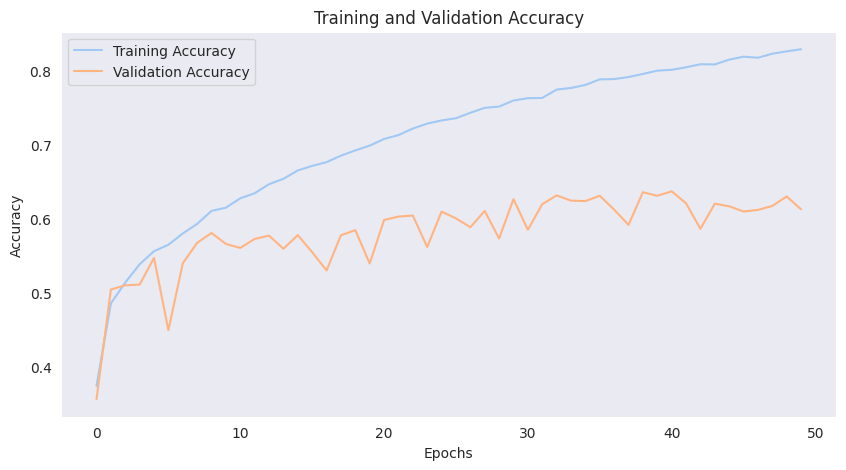

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# caculating the loss and accuracy of the model
loss, accuracy = model.evaluate(X_test_cnn,Y_test)

286/286 [==============================] - 4s 14ms/step - loss: 1.3730 - accuracy: 0.6127


## Hyperparameter Tuning

In [ ]:
import keras_tuner as kt

In [ ]:
# build a keras tuner for tuning the model
def tune_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=128, step=16),
                     kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                     strides=hp.Choice('strides', values=[1, 2, 3]),
                     padding='same',
                     activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
                     input_shape=(X_train.shape[1], 1)))
    model.add(Conv1D(32, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(14, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# initialization of the tuner
kTuner = kt.RandomSearch(tune_model,objective=['val_loss', 'val_accuracy','accuracy','loss'],max_trials=5)
kTuner

In [ ]:
# perform search for finding the best hperparameter
kTuner.search(X_train, Y_train, epochs=10, validation_split = 0.1)

Trial 5 Complete [00h 04m 24s]
multi_objective: 0.9562422037124634

Best multi_objective So Far: 0.9562422037124634
Total elapsed time: 00h 11m 25s


In [ ]:
# getting the best hyperparameter
best_hyperparameter = kTuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameter)

In [ ]:
# build the model for the best hyperparameter
model = kTuner.hypermodel.build(best_hyperparameter)

In [ ]:
history = model.fit(X_train_cnn, Y_train, epochs=30, validation_split = 0.1)

Epoch 1/30
770/770 [==============================] - 25s 29ms/step - loss: 2.0462 - accuracy: 0.3245 - val_loss: 1.7015 - val_accuracy: 0.4373
Epoch 2/30
770/770 [==============================] - 20s 26ms/step - loss: 1.5332 - accuracy: 0.4660 - val_loss: 1.4365 - val_accuracy: 0.4965
Epoch 3/30
770/770 [==============================] - 19s 25ms/step - loss: 1.3787 - accuracy: 0.5042 - val_loss: 1.3556 - val_accuracy: 0.5170
Epoch 4/30
770/770 [==============================] - 21s 28ms/step - loss: 1.2873 - accuracy: 0.5319 - val_loss: 1.2677 - val_accuracy: 0.5396
Epoch 5/30
770/770 [==============================] - 19s 25ms/step - loss: 1.2353 - accuracy: 0.5454 - val_loss: 1.2321 - val_accuracy: 0.5444
Epoch 6/30
770/770 [==============================] - 21s 27ms/step - loss: 1.1816 - accuracy: 0.5676 - val_loss: 1.1934 - val_accuracy: 0.5608
Epoch 7/30
770/770 [==============================] - 19s 25ms/step - loss: 1.1449 - accuracy: 0.5796 - val_loss: 1.1770 - val_accuracy:

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

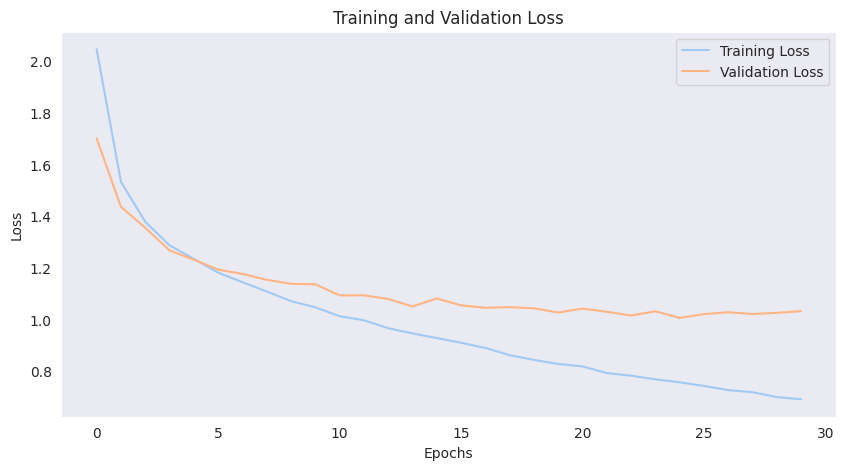

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# caculating the loss and accuracy of the model
loss, accuracy = model.evaluate(X_test_cnn,Y_test)

286/286 [==============================] - 2s 8ms/step - loss: 1.0188 - accuracy: 0.6352


### Saving the model

In [ ]:
# Save the model
model.save("emotion_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("model_weights.h5")
print("Model saved to disk.")

Model saved to disk.


In [ ]:
from keras.models import model_from_json

In [ ]:
# Load model architecture from JSON
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
loaded_model.load_weights("model_weights.h5")
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
# Compile the loaded model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model on test data
score = loaded_model.evaluate(X_test, Y_test)

# Print the accuracy score
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


286/286 [==============================] - 3s 9ms/step - loss: 1.0188 - accuracy: 0.6352
accuracy: 63.52%


In [ ]:
loaded_model.save('model.h5')

NameError: name 'loaded_model' is not defined

In [ ]:
import pickle

In [ ]:
# Save StandardScaler and encoder
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

print("Scalers saved to disk.")

# Load StandardScaler and encoder
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('encoder.pkl', 'rb') as encoder_file:
    loaded_encoder = pickle.load(encoder_file)

print("Scalers loaded from disk.")


Scalers saved to disk.
Scalers loaded from disk.


In [ ]:
!zip -r /content/trial.zip /content/untitled_project

  adding: content/untitled_project/ (stored 0%)
  adding: content/untitled_project/trial_2/ (stored 0%)
  adding: content/untitled_project/trial_2/trial.json (deflated 67%)
  adding: content/untitled_project/trial_2/checkpoint.index (deflated 66%)
  adding: content/untitled_project/trial_2/checkpoint (deflated 48%)
  adding: content/untitled_project/trial_2/checkpoint.data-00000-of-00001 (deflated 8%)
  adding: content/untitled_project/tuner0.json (stored 0%)
  adding: content/untitled_project/oracle.json (deflated 64%)
  adding: content/untitled_project/trial_0/ (stored 0%)
  adding: content/untitled_project/trial_0/trial.json (deflated 67%)
  adding: content/untitled_project/trial_0/checkpoint.index (deflated 66%)
  adding: content/untitled_project/trial_0/checkpoint (deflated 48%)
  adding: content/untitled_project/trial_0/checkpoint.data-00000-of-00001 (deflated 8%)
  adding: content/untitled_project/trial_1/ (stored 0%)
  adding: content/untitled_project/trial_1/trial.json (deflat